In [16]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Gabor filter
It is defined by a sinusoidal wave (a plane wave for 2D Gabor filters)
multiplied by a Gaussian function.

## Sinusoidal wave

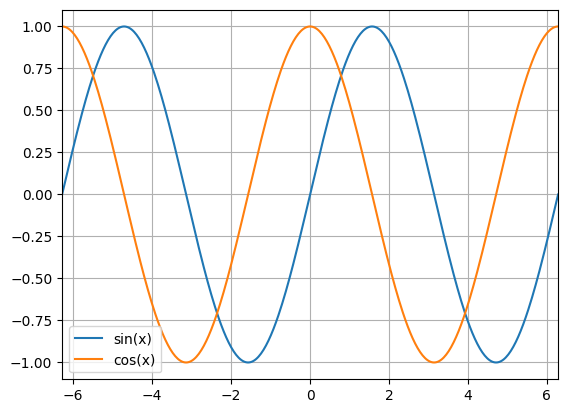

In [10]:
def plot_sinusoidal_wave():
    fig, ax = plt.subplots()
    ax.set_xlim(-2*np.pi, 2*np.pi)
    ax.set_ylim(-1.1, 1.1)

    ax.grid(True)

    x_set = np.linspace(-2*np.pi, 2*np.pi, 400)

    y_set = np.sin(x_set)
    ax.plot(x_set, y_set, label='sin(x)')

    y_set = np.cos(x_set)
    ax.plot(x_set, y_set, label='cos(x)')

    ax.legend()

    plt.show()

plot_sinusoidal_wave()

## Sinusoidal plane wave

We will deal with plane waves in 2D space. Calling these "plane waves" is
however disingenuous: In 2D Cartesian space, our "planes" are actually lines.
The reason we call these "plane waves" seem to be due to the fact this function
is very often used in physics, in 3D space. The idea however, is the same.

As we're dealing with 2D, we'll use `angle` instead of a unit vector (the
plane's normal) in order to represent the direction the wave "propagates".

```python
return amplitude * np.cos(
    2 * np.pi * spacial_frequency * (
        x*np.cos(angle) + y*np.sin(angle) - speed * time
    ) + phase_shift
)
```

We should first bring our attention to this part:
```
x*np.cos(angle) + y*np.sin(angle)
```

This is equivalent to `v.n` (`v` dot product `n`), if `v` is the vector `(x,
y)`, and `n` is the vector `(np.cos(angle), np.sin(angle))`.

`n` is the unit vector representing the direction the wave propagates towards.

So we now see that what that part really means is simply the dot product between
a given point and the direction the wave propagates towards. As we know, the dot
product can also be defined as:

```
A.B = |A| * |B| * cos(θ)
```

Where `θ` is the angle between the vectors `A` and `B`. This means that when the
vectors are orthogonal to one another (so the angle between them is 90º, or
π/2), the dot product between them will be zero.

No going back to our section of code:

```
x*np.cos(angle) + y*np.sin(angle)
```

We can now interpret this as: "be zero when the vector (x, y) is aligned to the
direction of wave propagation, and grow closer to the length of the vector (x,
y) the closer it is to being orthogonal to the direction of wave propagation".

The section:

```python
- speed * time
```

Is simply a way to move (or "propagate") the wave through space as a function of
time. `speed` is simply a scalar indicating how quickly the wave propagates for
every unit of time. The way this works in "propagating" the wave forward will
get clearer later.

The section:

```python
2 * np.pi * spacial_frequency
```

Is a way of "tightening up" the wave. The bigger the spacial frequency, the more
sensible a change in either the point (x, y) or time is to the result. This
value is multiplied by `2 * np.pi` because the wave is sinusoidal, so it
completes a cycle every "360º", or "2π radians", and we're working with radians
always. Multiplying the spacial frequency by 2π makes so that 1Hz actually means
1 cycle (2π radians) per second.

Putting it together:

```python
2 * np.pi * spacial_frequency * (
    x*np.cos(angle) + y*np.sin(angle) - speed * time
) + phase_shift
```

We see that we have a `+ phase_shift`, this is somewhat simple to understand,
the phase shift is a way for us to change where the wave peaks at any given time
or position. Changing the wave phase, while keeping the other things constant
achieves similar results to changing time. Physically that is less natural, as
the wave phase can be (and often is) constant, and time is always advancing.

We're finally back at the full equation:

```python
return amplitude * np.cos(
    2 * np.pi * spacial_frequency * (
        x*np.cos(angle) + y*np.sin(angle) - speed * time
    ) + phase_shift
)
```

`amplitude` determines the magnitude ("height") of the wave at its peak. It is
multiplied by a cosine, that we know oscillates from -1.0 to 1.0. Having an
`amplitude` of 2, for instance, would make it oscillate from -2.0 to 2.0.

Everything that we had seen before is inside the cosine function. This is what
will get us a wave shape. If we keep everything else constant, and change time,
we see how we are effectively moving the surface around, as it "propagates
through space". Even though we are subtracting `speed * time`, when time goes
forward, the wave propagates in the direction specified by the `angle`.

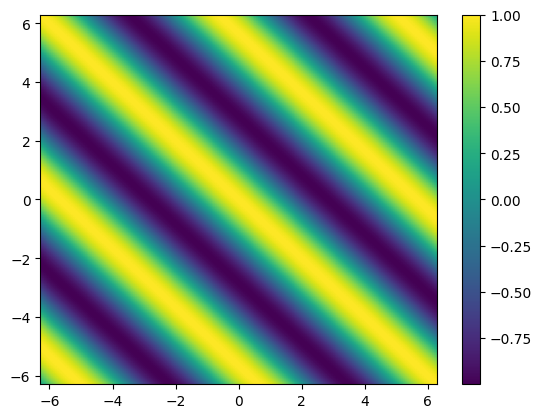

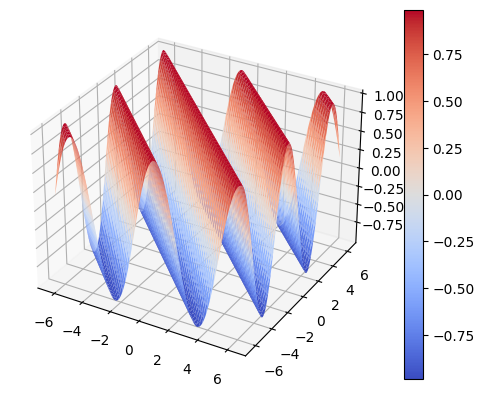

In [11]:
@np.vectorize
def sinusoidal_plane_wave_2d(
    x,
    y,
    time,
    angle,
    amplitude,
    spacial_frequency,
    phase_shift=0.0,
    speed=1.0,
):
    return amplitude * np.cos(
        2 * np.pi * spacial_frequency * (
            x*np.cos(angle) + y*np.sin(angle) - speed * time
        ) + phase_shift
    )

def plot_sinusoidal_plane_wave_2d():
    r_set = np.linspace(-2*np.pi, 2*np.pi, 600)

    fig, ax = plt.subplots()

    xx, yy = np.meshgrid(r_set, r_set)
    zz = sinusoidal_plane_wave_2d(xx, yy, 0.0, np.pi/4, 1.0, 0.25)

    heatmap = ax.pcolormesh(xx, yy, zz, shading='nearest')

    fig.colorbar(heatmap)

    plt.show()

    fig, ax = plt.subplots(subplot_kw={ "projection": "3d" })

    surface = ax.plot_surface(xx, yy, zz, cmap=matplotlib.cm.coolwarm)

    fig.colorbar(surface)

    plt.show()

plot_sinusoidal_plane_wave_2d()

## Gaussian function

It is a function of the base form:
```
f(x) = exp(-x^2)
```

That can be parametrized as:

```
f(x) = a * exp(-((x - b)^2)/(2 * c^2))
```

- `a` is the height of the curve's peak
- `b` is the position of the center of the peak
- `c` is the width of the "bell" (standard deviation)

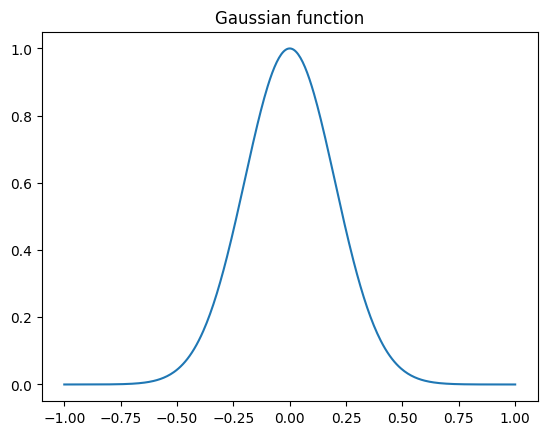

In [12]:
@np.vectorize
def gaussian(x, a=1.0, b=0.0, c=np.sqrt(0.5)):
    return a * np.exp(-((x - b)**2)/(2 * c**2))

def plot_gaussian():
    x_set = np.linspace(-1.0, 1.0, 400)
    y_set = gaussian(x_set, c=0.2)

    fig, ax = plt.subplots()

    ax.set_title("Gaussian function")
    ax.plot(x_set, y_set)

    plt.show()

plot_gaussian()

## 2-dimensional extension of the Gaussian function

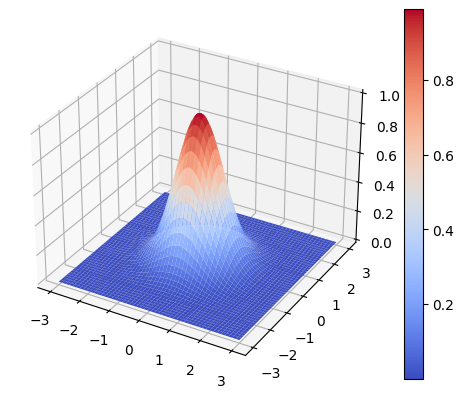

In [13]:
@np.vectorize
def gaussian_2d(
    x,
    y,
    amplitude=1.0,
    offset_x=0.0,
    offset_y=0.0,
    standard_deviation_x=np.sqrt(0.5),
    standard_deviation_y=np.sqrt(0.5)
):
    return amplitude * np.exp(
        - ((x - offset_x)**2)/(2 * standard_deviation_x**2)
        - ((y - offset_y)**2)/(2 * standard_deviation_y**2)
    )

def plot_gaussian_2d():
    r_set = np.linspace(-3.0, 3.0, 600)
    
    xx_set, yy_set = np.meshgrid(r_set, r_set)

    zz_set = gaussian_2d(xx_set, yy_set)

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    ax.set_zlim3d(0.0, 1.0)

    surface = ax.plot_surface(xx_set, yy_set, zz_set, cmap=matplotlib.cm.coolwarm)

    cbar = fig.colorbar(surface)

    plt.show()

plot_gaussian_2d()


## The Gabor Filter

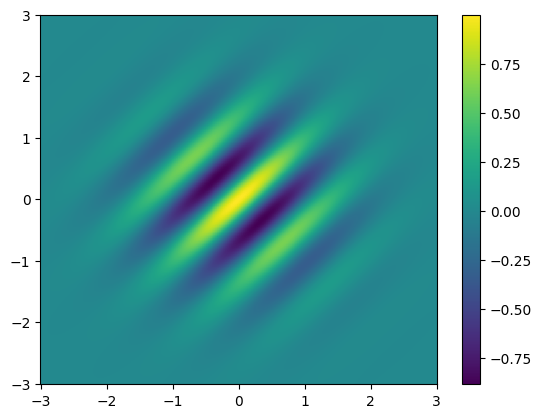

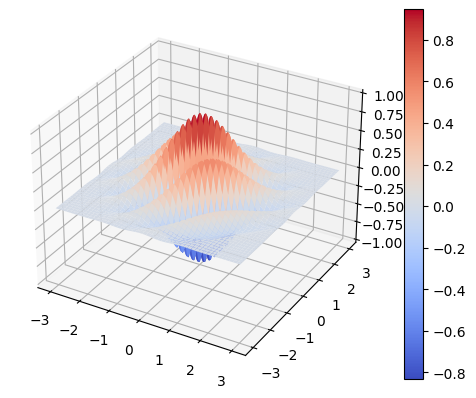

In [14]:
def gabor_2d(
    x,
    y,
    orientation,
    frequency=1.0,
    phase_shift=0.0,
    standard_deviation=np.sqrt(0.5),
    spatial_aspect_ratio=1.0,
):
    x_rot = np.cos(orientation)*x - np.sin(orientation)*y
    y_rot = np.sin(orientation)*x + np.cos(orientation)*y
    g = np.exp(-(x_rot**2 + spatial_aspect_ratio*(y_rot**2))/(2 * standard_deviation**2))
    w = np.cos(2*np.pi*frequency*x_rot + phase_shift) 
    return g * w

def plot_gabor_2d():
    r_set = np.linspace(-3.0, 3.0, 600)
    
    xx_set, yy_set = np.meshgrid(r_set, r_set)

    zz_set = gabor_2d(xx_set, yy_set, np.pi/4, frequency=1.0, standard_deviation=1.0)

    # First figure

    fig, ax = plt.subplots()

    heatmap = ax.pcolormesh(xx_set, yy_set, zz_set, shading='nearest')
    fig.colorbar(heatmap)

    plt.show()

    # Second figure

    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
    ax.set_zlim3d(-1.0, 1.0)

    surface = ax.plot_surface(xx_set, yy_set, zz_set, cmap=matplotlib.cm.coolwarm)
    cbar = fig.colorbar(surface)

    plt.show()

plot_gabor_2d()

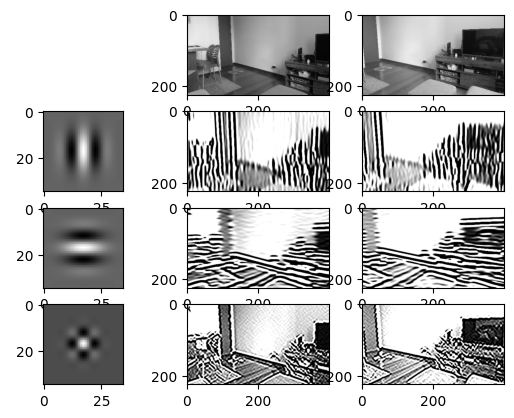

In [65]:
def make_gabor_kernel(px_size, orientation, f_range=3.0, freq=1.0, st_dev=np.sqrt(2)):
    r_set = np.linspace(-f_range, f_range, px_size)
    xx, yy = np.meshgrid(r_set, r_set)
    zz = gabor_2d(xx, yy, orientation, frequency=freq, standard_deviation=st_dev)

    return zz

def plot_gabor_convolve_image():
    st_dev = 1.0
    freq = 0.5
    kernel_size = 35

    kernel_v  = make_gabor_kernel(kernel_size, 0, freq=freq, st_dev=st_dev)
    kernel_h  = make_gabor_kernel(kernel_size, np.pi/2, freq=freq, st_dev=st_dev)
    # kernel_ne = make_gabor_kernel(35, np.pi/4, freq=freq, st_dev=st_dev)
    # kernel_se = make_gabor_kernel(35, 3*np.pi/4, freq=freq, st_dev=st_dev)
    kernel_b = 2 * kernel_v * kernel_h

    input_img_0 = cv2.imread("assets/living_room_0.jpg", cv2.IMREAD_GRAYSCALE)
    input_img_0 = cv2.resize(input_img_0, (400, 225))

    input_img_1 = cv2.imread("assets/living_room_1.jpg", cv2.IMREAD_GRAYSCALE)
    input_img_1 = cv2.resize(input_img_1, (400, 225))

    convolved_0_v = cv2.filter2D(input_img_0, -1, kernel_v)
    convolved_0_h = cv2.filter2D(input_img_0, -1, kernel_h)
    convolved_0_b = cv2.filter2D(input_img_0, -1, kernel_b)

    convolved_1_v = cv2.filter2D(input_img_1, -1, kernel_v)
    convolved_1_h = cv2.filter2D(input_img_1, -1, kernel_h)
    convolved_1_b = cv2.filter2D(input_img_1, -1, kernel_b)

    fig, axes = plt.subplots(4, 3)

    axes[0, 0].axis('off')
    axes[0, 1].imshow(input_img_0, cmap='gray')
    axes[0, 2].imshow(input_img_1, cmap='gray')

    axes[1, 0].imshow(kernel_v, cmap='gray')
    axes[1, 1].imshow(convolved_0_v, cmap='gray')
    axes[1, 2].imshow(convolved_1_v, cmap='gray')

    axes[2, 0].imshow(kernel_h, cmap='gray')
    axes[2, 1].imshow(convolved_0_h, cmap='gray')
    axes[2, 2].imshow(convolved_1_h, cmap='gray')

    axes[3, 0].imshow(kernel_b, cmap='gray')
    axes[3, 1].imshow(convolved_0_b, cmap='gray')
    axes[3, 2].imshow(convolved_1_b, cmap='gray')

    plt.show()

plot_gabor_convolve_image()